In [22]:
from google.colab import files
uploaded = files.upload()

Saving datasets_30069_39285_AppleStore.csv to datasets_30069_39285_AppleStore.csv


In [30]:
import io 
apps= pd.read_csv(io.BytesIO(uploaded['datasets_30069_39285_AppleStore.csv']))

In [31]:
apps.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


The data set comprises of information on 7200 apps on App store with following imp details

    "id" : App ID  
    "track_name": App Name  
    "size_bytes": Size (in Bytes)  
    "price": Price amount  
    "user_rating" 
    "prime_genre": Primary Genre  

change this creterions without id


In [32]:
data=apps[['track_name','size_bytes','price','user_rating','prime_genre']]

In [46]:
data['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

In [106]:
data['prime_genre'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [110]:
data['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

after we saw that, the most popular genres are   
* Games                3862
* Entertainment         535
* Education      453

In [47]:
data['price'].value_counts().head(10)

0.00    4056
0.99     728
2.99     683
1.99     621
4.99     394
3.99     277
6.99     166
9.99      81
5.99      52
7.99      33
Name: price, dtype: int64

average cost is 1.72, free are 4056 from 7197

look at most expensive app

In [90]:
data[data['price']==299.99]
data_filter=data[data['price']<60]


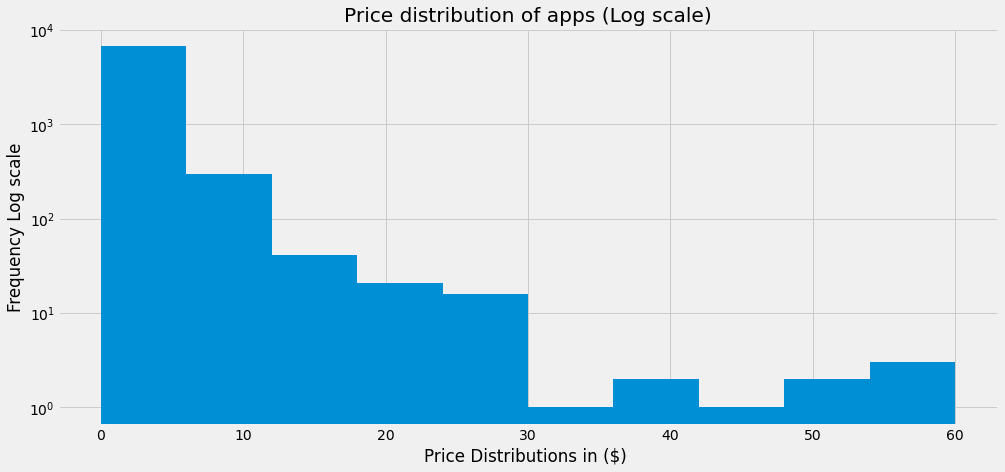

In [91]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(data_filter.price,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")
plt.show()


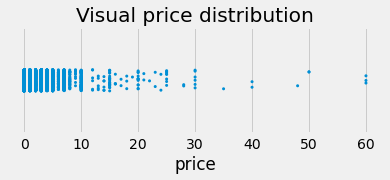

In [95]:
plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=data_filter,y='price',jitter= True,orient = 'h' 
,size=3)
plt.show()

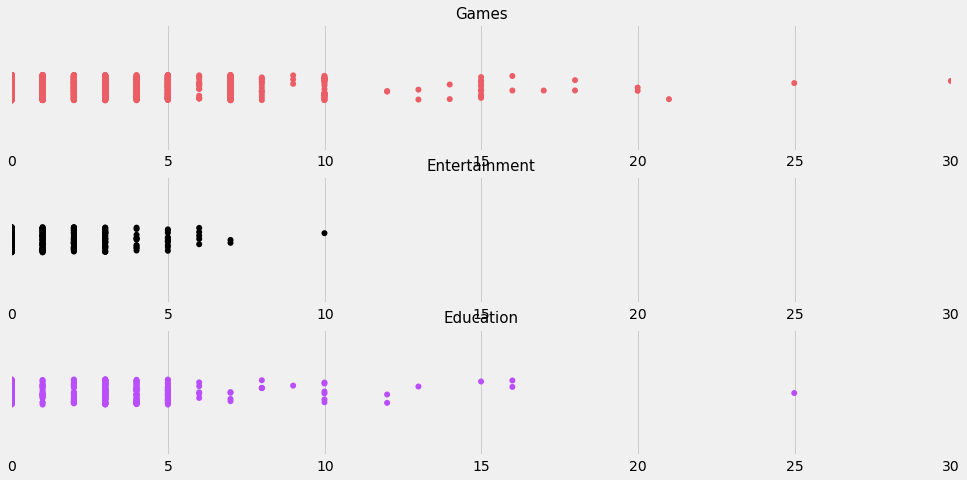

In [120]:
yrange = [0,30]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = data_filter[data_filter.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 
plt.subplot(4,1,2)
plt.xlim(yrange)
Entertainment = data_filter[data_filter.prime_genre=='Entertainment']
sns.stripplot(data=Entertainment,y='price',jitter= True , orient ='h',size=6,color='#000')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 
plt.subplot(4,1,3)
plt.xlim(yrange)
edu = data_filter[data_filter.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True , orient ='h',size=6,color='#b84efd')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 
plt.show()

In [126]:
s = data.prime_genre.value_counts().index[:3]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

In [138]:
data['broad_genre']=data.prime_genre.apply(lambda x: categ(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
free=data[data.price==0].broad_genre.value_counts().sort_index().to_frame()
paid=data[data.price>0].broad_genre.value_counts().sort_index().to_frame()
sum=data.broad_genre.value_counts().to_frame()
paidper=paid*100/sum
freeper=free*100/sum

In [236]:
free.columns=['free']
paid.columns=['paid']
sum.columns=['sum']
paidper.columns=['paidper']
freeper.columns=['freeper']
dist = free.join(paid).join(sum).join(paidper).join(freeper)


In [237]:
dist

,free,paid,sum,paidper,freeper
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1333,1014,2347,43.204090,56.795910


In [238]:
tuple_free = tuple(dist.freeper.tolist())
tuple_paid = tuple(dist.paidper.tolist())
tuple_free

(29.13907284768212, 62.429906542056074, 58.44122216468151, 56.7959096719216)

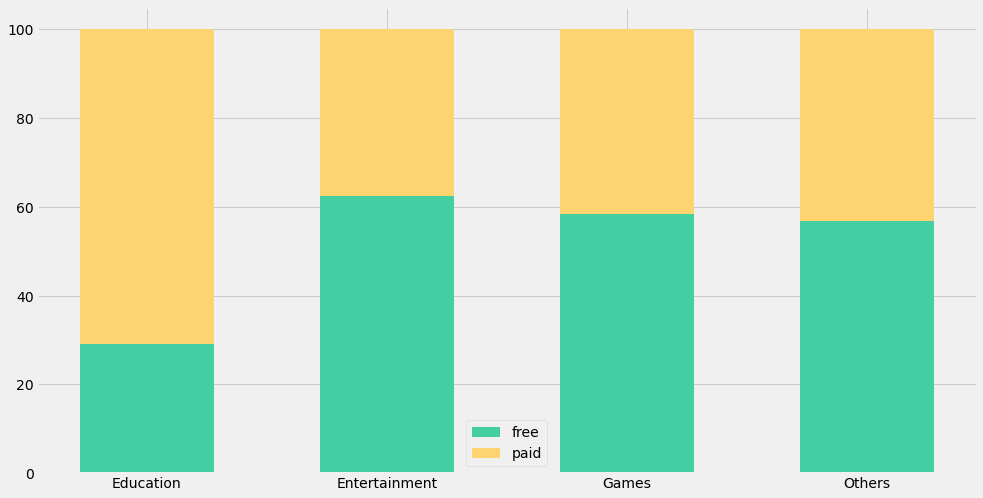

In [239]:
import numpy as np
plt.figure(figsize=(15,8))
N=4
ind = np.arange(N) 
width =0.56
p1 = plt.bar(ind, tuple_free, width, color='#45cea2')
p2 = plt.bar(ind, tuple_paid, width,bottom=tuple_free,color='#fdd470')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()

<Figure size 1080x576 with 0 Axes>

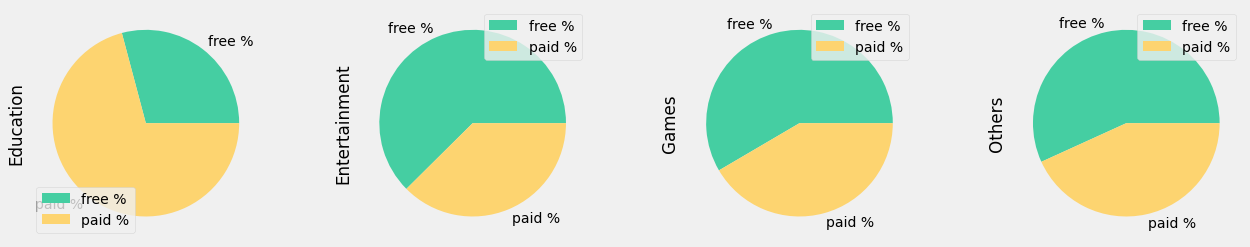

In [240]:
plt.figure(figsize=(15,8))
pies = dist[['freeper','paidper']]
pies.columns=['free %','paid %']
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#45cea2','#fdd470'])

plt.show()

In [241]:

def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

data['category']= data.price.apply(lambda x : paid(x))
data.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,track_name,size_bytes,price,user_rating,prime_genre,broad_genre,category,ra
7192,Kubik,126644224,0.00,4.5,Games,Games,Free,4.5
7193,VR Roller-Coaster,120760320,0.00,4.5,Games,Games,Free,4.5
7194,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,4.5,Utilities,Others,Paid,4.5
7195,VR Roller Coaster World - Virtual Reality,97235968,0.00,4.5,Games,Games,Free,4.5
7196,Escape the Sweet Shop Series,90898432,0.00,5.0,Games,Games,Free,5.0


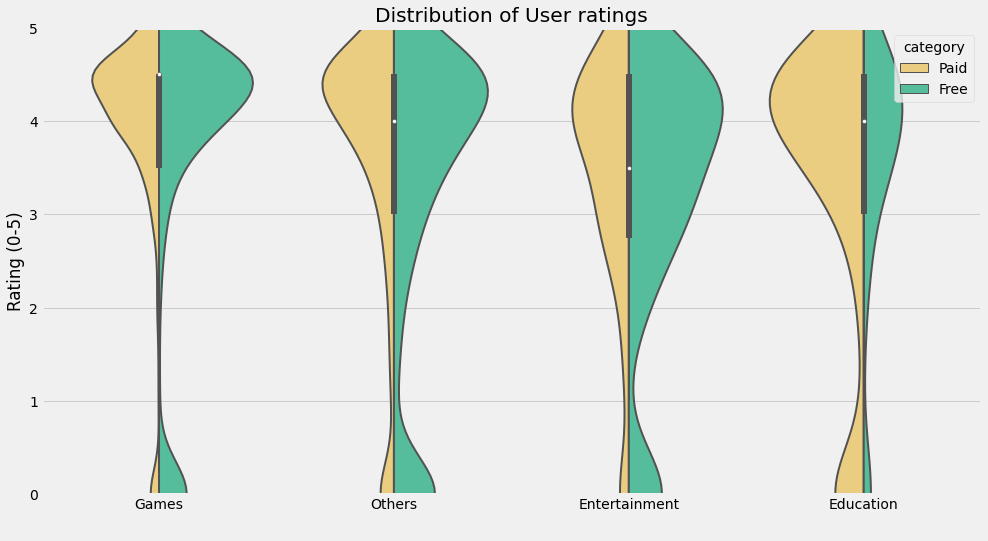

In [242]:
plt.figure(figsize=(15,8))

plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=data, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()


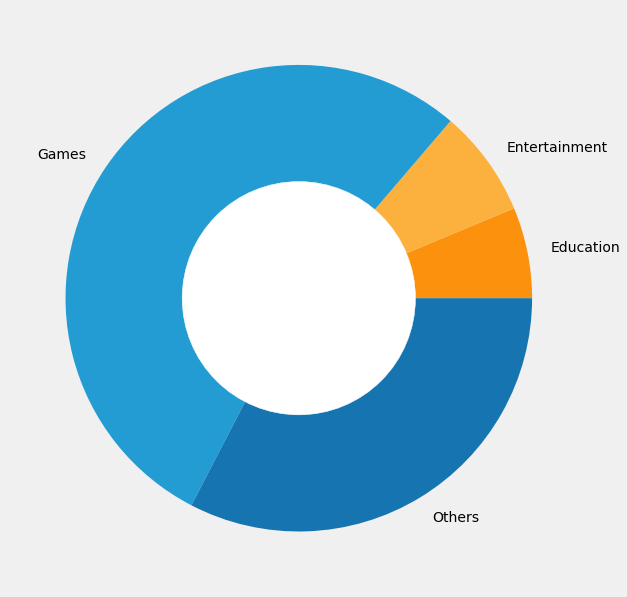

In [243]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=data.broad_genre.value_counts().sort_index().index
size = data.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

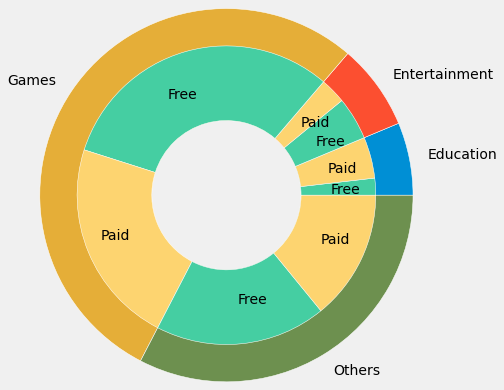

In [244]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(data=dist.free.values,columns=['num'])
p=pd.DataFrame(data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=data.broad_genre.value_counts().sort_index().index
group_size=data.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 4*h
sub= ['#45cea2','#fdd470']
subcolors= 4*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7,colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

